## Valor futuro

Generalización para estimar el valor futuro del dinero.

FV=PV*(1+R)<sup>n</sup>

In [1]:
import numpy_financial as npf
""" 
Se usa la librería numpy_financial para estimar el valor futuro

Primer parámetro es la tasa
Segundo parámetro es el número de periodos
Tercer parámetro es por si se presentan pagos
Cuarto parámetro es el monto inicial

El signo del resultado  es debio a que la función npf.fv
sigue la convención de signos de Excel: un valor futuro positivo 
conduce a un valor presente negativo y viceversa.
"""
npf.fv(0.1,2,0,100) #Valor futuro de $100 al final de dos años con tasa del 10%

-121.00000000000001

De la formula anterior podemos obtener el valor presente como:

$$
PV=\frac{FV}{(1+R)^{n}}
$$

In [2]:
#Planeamos tener$234 al final del 5 año y la tasa es de 1.45%

print(234/(1+0.0145)**5)
npf.pv(0.0145,5,0,234) #Con la librería numpy_financial


217.74871488824184


-217.74871488824184

### Valor presente de una perpetuidad

$$
PV(perpetuidad)=\frac{C}{R}
$$

Donde 

C= primer flujo de efevtivo

R= tasa

### Valor presente de una perpetuidad creciente

$$
PV(perpetuidad creciente)=\frac{C}{R-g}
$$

g = la tasa de crecimiento de los flujos de efectivo


Para una perpetuidad, si el primer flujo de efectivo ocurre al final del periodo *k*, tenemos la siguiente formula:

$$
PV(perpetuidad, 1er flujo al final del k-ésimo periodo)=\frac{1}{(1+R)^{k-1}}\frac{C}{R-g}
$$

### Valor presente y futuro de una anualidad

$$
PV(anualidad)=\frac{C}{R}[(1+R)^{n}-1]
$$

$$
FV(anualidad)=\frac{C}{R}[(1+R)^{n}-1]
$$

En estas fórmulas se supone que los flujos de efectivo ocurren al final de los periodos, en una anualidad o perpetuidad, cuando los flujos de efectivo ocurren al comienzo de cada periodo, se denominan anualidad o perpetuidad anticipada

In [3]:
#Ejemplo 1
"""
tasa = 1%
flujo de caja anual = $20
n = 10 años

El primer flujo de efectivo se paga hoy
"""
npf.pv(0.01,10,20,0,1) #El último valor 1 =  anualidad anticipada

-191.32035152017377

# Cálculo de los pagos de un préstamos y la tabla de amortización

Supongamos que deseas comprar un automóvil por $15,000. Solo tienes $5,000. Un banco te presta $10,000 a una tasa del 7% de interés efectivo anual que debes devolver en 5 años. ¿Cuál es tu pago anual por el automóvil?. Y ¿la tabla de amortización?

Antes de construir la tabla de amortización necesitamos calcular el pago anual de nuestro préstamo

In [4]:
#Importando librerías, también se usa numpy_financial pero esta se importó previamente en el notebook
import pandas as pd
import numpy as np

In [5]:
#Configurando las variables conocidas y calculando la cuota anual

car_loan = 10000
interest = 0.07
years = 5
car_payments = npf.pmt(rate=interest,nper=years,pv= -car_loan)
print(car_payments)

2438.9069444137394


Este resultado quiere decir que el préstamos nos costará $2438 en pagos anuales.

Podemos crear una tabla de programación de pagos y ver como el saldo del préstamo se va reduciendo a 0

In [6]:
#Creamos una tabla de 5 filas y 6 columnas llenas de ceros
loan_table = np.zeros((5,6))

#Convertimos la tabla en un data frame

loan_table = pd.DataFrame(loan_table)

#Asigmnamos los nombres de las columnas

loan_table.columns = ['Año', 'Saldo inicial', 'Pago', 'Intereses', 'Principal', 'Saldo final']

print(loan_table)

   Año  Saldo inicial  Pago  Intereses  Principal  Saldo final
0  0.0            0.0   0.0        0.0        0.0          0.0
1  0.0            0.0   0.0        0.0        0.0          0.0
2  0.0            0.0   0.0        0.0        0.0          0.0
3  0.0            0.0   0.0        0.0        0.0          0.0
4  0.0            0.0   0.0        0.0        0.0          0.0


Una vez tenemos construida la tabla podemos rellenarla. Necesitamos rellenar la primer fila manualmente

In [7]:
# Fila 0 y columna 0 de año 1
loan_table.iloc[0,0] = 1

#Saldo incial es el monto del préstamo
loan_table.iloc[0,1] = car_loan

#Los pagos del automóvil son los calculados previamente
loan_table.iloc[0,2]=car_payments

#El pago incial es el monto del préstamo por los intereses
loan_table.iloc[0,3]=car_loan * interest

#El principal es el pago de la cuota menos los intereses
loan_table.iloc[0,4]=  car_payments - (car_loan * interest)

#El saldo final, es el saldo inicial menos el principal
loan_table.iloc[0,5]=car_loan-(car_payments - (car_loan*interest))

print(loan_table)

   Año  Saldo inicial         Pago  Intereses    Principal  Saldo final
0  1.0        10000.0  2438.906944      700.0  1738.906944  8261.093056
1  0.0            0.0     0.000000        0.0     0.000000     0.000000
2  0.0            0.0     0.000000        0.0     0.000000     0.000000
3  0.0            0.0     0.000000        0.0     0.000000     0.000000
4  0.0            0.0     0.000000        0.0     0.000000     0.000000


Una vez llena la primer fila, podemos ejecutar un ciclo for para calcular los demás valores

In [8]:
for i in range(1,5):
    loan_table.iloc[i,0] =i + 1 #Fila del año
    loan_table.iloc[i,1] = loan_table.iloc[(i-1),5] #El saldo inicial es el saldo final de años anteriores
    loan_table.iloc[i,2] = car_payments #Los pagos son la cuota por año
    loan_table.iloc[i,3]= loan_table.iloc[i,1] * interest #El interes anual es el saldo incial * tasa de interés
    loan_table.iloc[i,4] = car_payments - (loan_table.iloc[i,1] * interest) #Cuota menos los intereses
    loan_table.iloc[i,5] = loan_table.iloc[i,1]- loan_table.iloc[i,4]#Saldo final =  saldo inicial - principal 

loan_table = loan_table.round(2) #Rendondeamos a 2 decimales

print(loan_table)

   Año  Saldo inicial     Pago  Intereses  Principal  Saldo final
0  1.0       10000.00  2438.91     700.00    1738.91      8261.09
1  2.0        8261.09  2438.91     578.28    1860.63      6400.46
2  3.0        6400.46  2438.91     448.03    1990.87      4409.59
3  4.0        4409.59  2438.91     308.67    2130.24      2279.35
4  5.0        2279.35  2438.91     159.55    2279.35         0.00


In [9]:
total_principal = loan_table['Principal'].sum()
total_pago = loan_table['Pago'].sum()
print(total_principal, total_pago)


10000.0 12194.55


## Valor presente neto (VPN)

$$VPN=VP(ingresos)-VP(egresos)$$

Ejemplo: Le invitan a invertir $100 en un proyecto. Las entradas de efectivo en los próximos cinco años son $50, $60, $70, $100 y $20, a partir del primer año. Si la tasa de descuento es de 11.2%. ¿Cuál es el valor de VPN del proyecto?

In [10]:
#Dado que hay 6 flujos de efectivo nosotros podríamos hacer el cálculo manualmente
r=0.112
-100+50/(1+r)+60/(1+r)**2+70/(1+r)**3+100/(1+r)**4+20/(1+r)**5

121.55722687966407

In [11]:
#Usando la función vpn(rate, values), el proceso se simplifica bastante
cashflows=[-100,50,60,70,100,20]
npf.npv(0.112, cashflows)

121.55722687966407

El VPN está relacionado negativamente con la tasa de descuento. La razón es que cuando la tasa de descuento aumenta, el valor presente de los flujos de efectivo futuroa disminuirá más que los flujos de efectivo actuales o los primeros.

El siguiente gráfico describe la relaxión entre el VPN y la tasa de descuento.

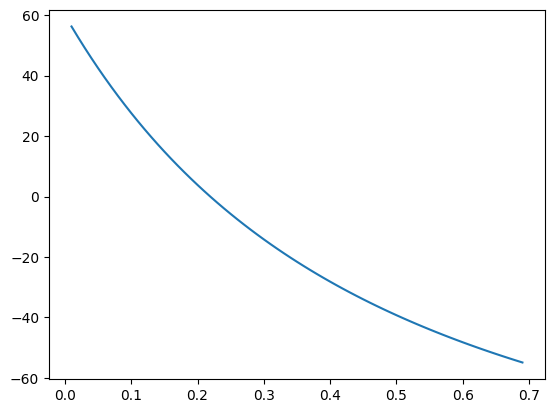

In [13]:
from matplotlib.pyplot import *

cashflows=[-120,50,60,70]
rate=[]
npv=[]

for i in range(1,70):
    rate.append(0.01*i)
    npv.append(npf.npv(0.01*i, cashflows))

plot(rate,npv)
show()

La regla del VPN es simple:

$$ VPN>0 \text{ se acepta}$$
$$ VPN<0 \text{ se rechaza}$$

## TIR (tasa interna de rendimiento)

Se define como la tasa que hace que el VPN sea igual a cero. Supongamos que invertimos $100 hoy y los flujos de efectivo futuros serán de $30, $40, $40, y $50 por los próximos 4 años. Suponiendo que los flujos de efectivo ocurran al final del año, ¿Cuál es la TIR de esta inversión?

In [14]:
cashflows = [-100, 30, 40, 40, 50]
npf.irr(cashflows)

0.2001879105140867

In [15]:
#Verificando que esta tasa hace el VPN = 0

r=npf.irr(cashflows)
npf.npv(r, cashflows)

1.7763568394002505e-14

Para un proyecyo, la regla TIR se da:

$$\text{si } TIR > Rc \text{ se acepta} $$
$$\text{si } TIR < Rc \text{ se rechaza} $$

Donde $Rc$ = costo de capital